In [1]:
import torch
import torch.nn.functional as F
import numpy as np
from pathlib import Path
from sklearn.neighbors import kneighbors_graph
from torch import nn

In [407]:
datasets_path = Path("/buckets/datasets/repr/")
# dataset_name = "cifar10"
dataset_name = "cifar100"
model_name = "clipvitL14"
# model_name = "dinov2"
X = np.load(datasets_path / f"{model_name}/{dataset_name}_feats_train.npy")
y = np.load(datasets_path / f"{model_name}/{dataset_name}_y_train.npy")



In [ ]:
model_name = "clipvitL14"
X1 = np.load(datasets_path / f"{model_name}/{dataset_name}_feats_train.npy")
y1 = np.load(datasets_path / f"{model_name}/{dataset_name}_y_train.npy")
model_name = "dinov2"
X2 = np.load(datasets_path / f"{model_name}/{dataset_name}_feats_train.npy")
y2 = np.load(datasets_path / f"{model_name}/{dataset_name}_y_train.npy")

In [286]:
assert (y1!=y2).sum() == 0

NameError: name 'y1' is not defined

In [357]:
X = np.concatenate(
    [
        X1 / np.linalg.norm(X1, axis=1, keepdims=True),
        X2 / np.linalg.norm(X2, axis=1, keepdims=True),
    ],
    axis=1,
)
X = np.concatenate([X1, X2], axis=1)
X.shape

(50000, 2304)

In [408]:
K = y.max()-y.min() + 1
K

np.int64(100)

In [409]:
X.shape

(50000, 768)

In [410]:
X_val = np.load(datasets_path / f"{model_name}/{dataset_name}_feats_val.npy")
y_val = np.load(datasets_path / f"{model_name}/{dataset_name}_y_val.npy")

In [ ]:
model_name = "clipvitL14"
X1_val = np.load(datasets_path / f"{model_name}/{dataset_name}_feats_val.npy")
y1_val = np.load(datasets_path / f"{model_name}/{dataset_name}_y_val.npy")
model_name = "dinov2"
X2_val = np.load(datasets_path / f"{model_name}/{dataset_name}_feats_val.npy")
y2_val = np.load(datasets_path / f"{model_name}/{dataset_name}_y_val.npy")

In [290]:
assert (y1_val!=y2_val).sum() == 0

NameError: name 'y1_val' is not defined

In [6]:
# X1_val = X1_val / np.linalg.norm(X1_val, axis=1, keepdims=True)
# X2_val = X2_val / np.linalg.norm(X2_val, axis=1, keepdims=True)
X_val = np.concatenate([X1_val, X2_val], axis=1)
X_val.shape

NameError: name 'X1_val' is not defined

In [256]:
if True:
    distances_1 = kneighbors_graph(X1/np.linalg.norm(X1, axis=1, keepdims=True), n_neighbors=100, mode="distance")
    distances_2 = kneighbors_graph(X2/np.linalg.norm(X2, axis=1, keepdims=True), n_neighbors=100, mode="distance")

KeyboardInterrupt: 

In [ ]:
distances_1 = kneighbors_graph(X1, n_neighbors=100, mode="connectivity")
distances_2 = kneighbors_graph(X2, n_neighbors=100, mode="connectivity")

In [426]:
distances = kneighbors_graph(X, n_neighbors=100, mode="distance")

In [427]:
from scipy.sparse.csgraph import connected_components

In [428]:
# connected_components(distances_1), connected_components(distances_2)
connected_components(distances)

(1, array([0, 0, 0, ..., 0, 0, 0], shape=(50000,), dtype=int32))

In [429]:
# from sklearn.linear_model import LogisticRegression

In [430]:
# clf = LogisticRegression(max_iter=500).fit(X,y)

In [431]:
# clf.score(X_val,y_val)

In [432]:
X_t = torch.tensor(X).float().to("cuda:1")
y_t = torch.tensor(y).int().to("cuda:1")

In [433]:
# W_exp= distances

In [420]:
# distances = (distances_1 + distances_2)/2

In [421]:
# W_exp = (distances + distances.T)/2

In [422]:
import scipy.sparse as sp

In [456]:
W = (distances + distances.T)/2

In [457]:
W.data

array([6.02143406, 5.02901821, 4.72192227, ..., 6.21961174, 5.98837799,
       5.73700836], shape=(7815078,))

In [458]:
W_exp = (W / W.sum(axis=1))

In [459]:
connect = W.copy()

In [460]:
connect.data = np.ones_like(W.data)

In [461]:
d = sp.diags(np.array(connect.sum(axis=1).flatten())[0],0)

In [462]:
W_exp = W_exp @ d 

In [463]:
W_exp.data

array([1.96187773, 0.97757739, 1.10362557, ..., 0.42931343, 0.71933697,
       0.48937613], shape=(7815078,))

In [464]:
W_exp.data = np.exp(-W_exp.data**2 / 2.0)

In [294]:
W_exp = (W_exp + W_exp)/2

In [465]:
D = W_exp.sum(axis=0)

In [466]:
W_exp

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7815078 stored elements and shape (50000, 50000)>

In [ ]:
# import matplotlib.pyplot as plt
# plt.hist(np.log(np.array(D).reshape(-1,)), bins=32,align="right")

In [467]:
np.array(D)[0]

array([86.31771912, 78.61829768, 82.34418588, ..., 82.77935532,
       96.06670396, 98.71568537], shape=(50000,))

In [468]:
np.array(D)[0].max()

np.float64(142.85142564186785)

(array([2.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 5.000e+00, 9.000e+00,
        6.000e+00, 1.000e+00, 4.000e+00, 8.000e+00, 2.100e+01, 1.600e+01,
        1.300e+01, 1.600e+01, 2.400e+01, 2.500e+01, 2.800e+01, 3.500e+01,
        5.200e+01, 4.600e+01, 6.800e+01, 7.400e+01, 9.500e+01, 1.260e+02,
        1.960e+02, 2.730e+02, 4.190e+02, 6.810e+02, 1.085e+03, 1.655e+03,
        2.157e+03, 2.828e+03, 3.453e+03, 3.914e+03, 4.077e+03, 4.185e+03,
        4.107e+03, 3.663e+03, 3.234e+03, 2.894e+03, 2.298e+03, 1.945e+03,
        1.503e+03, 1.196e+03, 8.800e+02, 6.970e+02, 5.740e+02, 4.460e+02,
        2.840e+02, 2.250e+02, 1.610e+02, 9.800e+01, 7.200e+01, 4.300e+01,
        2.500e+01, 2.100e+01, 7.000e+00, 9.000e+00, 3.000e+00, 6.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 15.52849934,  17.51792006,  19.50734079,  21.49676151,
         23.48618223,  25.47560296,  27.46502368,  29.4544444 ,
         31.44386513,  33.43328585,  35.42270657,  37.4121273 ,
         39.40

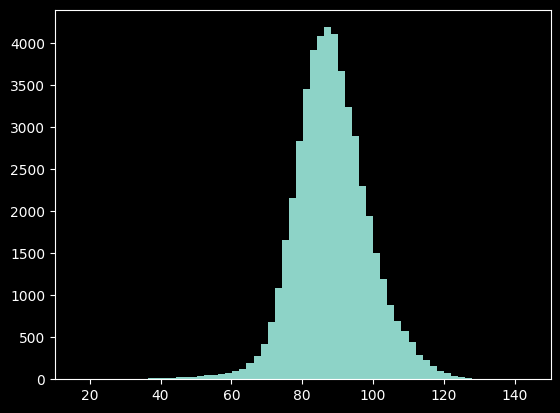

In [469]:
import matplotlib.pyplot as plt
# plt.hist(np.log(np.array(D).reshape(-1,)), bins=32,align="right")
plt.hist(np.array(D)[0], bins=64,align="right")

In [300]:
def stick_breaking_logits_to_probs_log(Y: torch.Tensor, dim: int = -1) -> torch.Tensor:
    """log-domain stick-breaking: Y (..., K-1) -> P (..., K)."""
    K = Y.size(dim)
    if K < 1:
        raise ValueError("Y must have size >= 1 along `dim`.")
    log_z  = F.logsigmoid(Y)    # log sigma(Y)
    log_1mz = F.logsigmoid(-Y)   # log(1 - sigma(Y)) = log sigma(-Y)
    S = torch.cumsum(log_1mz, dim=dim)
    # Build exclusive prefix of S by padding a zero then dropping the last elem
    zeros_shape = list(Y.shape)
    zeros_shape[dim] = 1
    zeros = torch.zeros(zeros_shape, dtype=Y.dtype, device=Y.device)
    # helper slices
    idx = [slice(None)] * Y.ndim
    idx_last = idx.copy()
    idx_last[dim] = slice(K-1, K)
    idx_up_to = idx.copy()
    idx_up_to[dim] = slice(0, K-1)
    prefix = torch.cat([zeros, S[tuple(idx_up_to)]], dim=dim)
    log_p_except_last = log_z + prefix
    log_p_last = S[tuple(idx_last)]
    return torch.cat([log_p_except_last, log_p_last], dim=dim)

In [470]:
from torch import nn

class ClusterBias(nn.Module):

    def __init__(self, K:int):
        super().__init__()
        self.biases = nn.Parameter(torch.zeros((1, K-1)), requires_grad=True)
    
    def forward(self, Z):
        # biases = F.(self.biases, )
        biases = F.pad(self.biases,(1,0), value=0.0)
        Y_for_Z = Z + biases.detach()
        Y_for_biases = Z.detach()+ biases
        return Y_for_Z, Y_for_biases


In [471]:
hidden_dim = X.shape[1]

In [472]:
import triton
network = nn.Sequential(
    # nn.Linear(hidden_dim, 512),
    nn.Linear(hidden_dim, K),
    # nn.RMSNorm(1024),
    # nn.SiLU(),
    # nn.ReLU(),
    # nn.Linear(hidden_dim, K - 1,bias=False), ClusterBias(K))
    # nn.Linear(hidden_dim, triton.next_power_of_2(K)),
    # nn.RMSNorm(512),
    # nn.SiLU(),
    # nn.Linear(512, 512),
    # nn.ReLU(),
    # nn.Linear(512, 512),
    # nn.ReLU(),
    # nn.Linear(512, triton.next_power_of_2(K)),
    # nn.Linear(512, K),
    # nn.SiLU(),
    # ClusterBias(K)
      )
# network = nn.Sequential( nn.Linear(hidden_dim, K - 1,bias=True), ClusterBias(K))
# 
# network = nn.Sequential( nn.Linear(hidden_dim, K)).cuda()

# mid_dim = 1024
# network = nn.Sequential(
#     nn.Linear(hidden_dim, mid_dim),
#     nn.GELU(),
#     nn.Linear(mid_dim,mid_dim),
#     nn.GELU(),
#     nn.Linear(mid_dim,K,bias=False),
# )
network = network.to(X_t)

In [438]:
class NonParametricLogits(nn.Module):

    def __init__(self,n, k):
        super().__init__()
        self.logits = nn.Parameter(torch.randn(n,k)/100.0, requires_grad=True)
        self.register_parameter("logits", self.logits)

    def forward(self, indices):
        return self.logits[indices]

    def __repr__(self):
        return super().__repr__().replace("()", f"{tuple(self.logits.shape)}")

network = NonParametricLogits(X_t.shape[0], K).to(X_t)

In [473]:
network

Sequential(
  (0): Linear(in_features=768, out_features=100, bias=True)
)

In [474]:
from hygem.pairs import get_pairs_unique_map
import numpy as np

In [475]:
from torch import optim
optimizer = optim.AdamW(network.parameters(), lr=1e-4, weight_decay=1e-4)
# optimizer = optim.AdamW(network.parameters(), lr=2e-2, weight_decay=1e-3, betas=(0.9, 0.999))
# optimizer = optim.SGD(network.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-3)


In [476]:
list(network.parameters())

[Parameter containing:
 tensor([[ 0.0300, -0.0261,  0.0276,  ...,  0.0359, -0.0124, -0.0066],
         [ 0.0147, -0.0245,  0.0036,  ..., -0.0265,  0.0153,  0.0282],
         [ 0.0176,  0.0342, -0.0227,  ...,  0.0310,  0.0119,  0.0150],
         ...,
         [ 0.0229,  0.0311, -0.0088,  ..., -0.0329, -0.0286,  0.0300],
         [-0.0206,  0.0204,  0.0242,  ..., -0.0277, -0.0190,  0.0179],
         [-0.0035, -0.0171, -0.0336,  ..., -0.0124, -0.0082,  0.0044]],
        device='cuda:1', requires_grad=True),
 Parameter containing:
 tensor([ 3.1720e-02,  2.0177e-02,  3.1359e-02,  2.3326e-02,  2.1935e-02,
         -1.2492e-03,  2.6620e-02, -2.2033e-02,  1.0885e-03, -3.4670e-02,
         -1.8535e-02,  2.9901e-02, -2.4037e-02, -2.1879e-02,  2.0280e-03,
         -2.2622e-02,  3.5527e-03,  1.5933e-02,  3.3984e-02,  2.0664e-02,
          3.2072e-02, -3.5709e-02, -2.8157e-03,  1.0079e-02, -1.0322e-02,
         -2.4003e-05, -1.5598e-02, -1.0861e-02,  3.2095e-02, -1.7546e-02,
          4.2058e-03,  

In [477]:
# for _ in range(1000):
#     random_idx = np.random.choice( X.shape[0], batch_pair_size, replace=False)
#     x_batch = X[random_idx]
#     _, y_for_bias = network(x_batch)
#     # y_for_bias,_ = network(x_batch)
#     # y_for_bias = network(x_batch)
#     # p_for_bias = stick_breaking_logits_to_probs_log(y_for_bias).exp()
#     # p_for_bias = network(x_batch)
#     p_for_bias = torch.softmax(y_for_bias,dim=-1)
#     balance = (p_for_bias.mean(0) - 1 / K).square().sum()
#     loss = balance
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#     with torch.no_grad():
#         print(loss.item(), balance.item(), p_for_bias.sum(1).max())
#         print(p_for_bias.mean(0).cpu().numpy())


In [478]:
pairs = np.array(W_exp.nonzero()).T
pairs.shape
pairs.shape[0], 2**24

(7815078, 16777216)

In [479]:
batch_pair_size = 512*2*16

In [480]:

import torch
from torch.utils.data import Dataset, DataLoader

class ShuffledRangeDataset(Dataset):
    def __init__(self, n: int, k: int):
        self.n = n
        self.k = k
        self.perm = torch.randperm(n)
        self.num_batches = n // k
        self.taken = 0
    
    def __len__(self):
        return self.n // self.k
    
    def __getitem__(self, idx):
        self.taken += 1
        if self.taken >= self.num_batches:
            self.perm = torch.randperm(self.n)
            self.taken = 0


        start = idx * self.k
        return self.perm[start:start + self.k]
    
    def shuffle(self):
        """Call at epoch end."""
        self.perm = torch.randperm(self.n)


dataset = ShuffledRangeDataset(n=pairs.shape[0], k=batch_pair_size)
loader = DataLoader(dataset, batch_size=1, num_workers=2)  # num_workers=0 for shared perm


In [481]:
len(dataset) * batch_pair_size, batch_pair_size, len(dataset)

(7798784, 16384, 476)

In [482]:
for random_pairs_idx in loader:
    print(random_pairs_idx.shape)
    break

torch.Size([1, 16384])


In [483]:
random_pairs_idx.shape

torch.Size([1, 16384])

In [484]:
import importlib
import gradient_monitor
importlib.reload(gradient_monitor)
from gradient_monitor import GradientMonitor
from gradient_monitor import GradientMixer


In [485]:
grad_mix = GradientMixer(
    network.named_parameters(), loss_scale={"pcut": 1.0, "balance": 1.0}
)

In [486]:
K

np.int64(100)

In [487]:
import torch.nn.functional as F

In [488]:
from sklearn.metrics import confusion_matrix, normalized_mutual_info_score
from hygem.metric import evaluate_clustering
from torch import optim

pcut_weight = 1.0

step = 0
for _ in range(10):
    for random_pairs_idx in loader:
        random_pairs_idx = random_pairs_idx[0]
        step += 1
        # random_pairs_idx = np.random.choice(
        #     pairs.shape[0], batch_pair_size, replace=False
        # )
        batch_pairs = pairs[random_pairs_idx]
        unique_idx, left_idx, right_idx = get_pairs_unique_map(batch_pairs)

        w = (
            torch.tensor(np.array(W_exp[batch_pairs[:,0],batch_pairs[:, 1]]))
            .to(X_t)
        ).squeeze()

        
        # w = (
        #     torch.tensor(
        #         np.array(W_exp[batch_pairs[:, 0]][:, batch_pairs[:, 1]].toarray())
        #     ).to(X)
        # ).squeeze()
        x_batch = X_t[unique_idx].clone().contiguous()
        y_batch = y_t[unique_idx].clone().contiguous()
        # y_for_z, y_for_bias = network(x_batch)
        y_for_z = network(x_batch)
        # y_for_z = network(unique_idx)
        # y_for_z = y_for_bias = network(x_batch)
        p_for_z = torch.softmax(y_for_z, dim=-1)
        p_for_bias = p_for_z
        # p_for_bias = torch.softmax(y_for_bias,dim=-1)

        p_for_z_left = p_for_z[left_idx]  # [:,None]
        p_for_z_right = p_for_z[right_idx]#[None,:]
        # y_for_z_left = torch.log_softmax(y_for_z[left_idx],dim=-1)#[:,None]
        # y_for_z_right = torch.log_softmax( y_for_z[right_idx], dim=-1)

        pcut = (
            (
                w.unsqueeze(-1)
                # w
                * (
                    # -p_for_z_left * y_for_z_right
                    # - p_for_z_right * y_for_z_left
                    p_for_z_left*(1-p_for_z_right)
                )
            ).mean(0)
            # .sum()
            # .mean()
        )

        # pcut = (
        #     (
        #         w.unsqueeze(-1)
        #         # w
        #         * (
        #             # -p_for_z_left * y_for_z_right
        #    - (p_for_z_left[:,None] *y_for_z_right[None,:])


        #     # (p_for_z_left[:,None] * (1-p_for_z_right[None,])
        #         )
        #     ).sum(dim=(0,1))
        #     # .sum()
        #     # .mean()
        # )
        # pcut = (pcut / (p_for_bias.mean(0).detach()+1e-10)).sum()/w.sum()
        pcut = pcut.sum()/w.sum()
        # pcut = pcut.mean() / w.sum()

        # balance = (p_for_bias.mean(0) - 1 / K).square().sum()
        balance = -torch.special.entr(p_for_bias.mean(0)).sum()

        # loss = pcut_weight * pcut + balance
        assert not any([torch.isnan(pcut).any(), balance.isnan().any()])

        optimizer.zero_grad()

        with grad_mix("pcut"):
            pcut.backward(retain_graph=True)

        with grad_mix("balance"):
            balance.backward()

        # loss = pcut + 100.0 * balance
        # loss.backward()
        # for p in network.parameters():
        #     if p.grad.isnan().any():
        #         raise ValueError("Nan here")


        optimizer.step()
        if step % 10 == 0:
            with torch.no_grad():
                # Z, _ = network(X)
                Z = network(X_t)
                # Z = network.logits.data.clone()
                pred = Z.argmax(dim=-1)
                results = evaluate_clustering(
                    y, pred.cpu().numpy(), K
                )

                print(
                    pcut.item(),
                    balance.item(),
                    results["accuracy"],
                    results["nmi"],
                )


6.031955126672983e-05 -4.5491838455200195 0.03764 0.11576575558492973
6.031523662386462e-05 -4.556342124938965 0.03064 0.08689253439238553
6.030350778019056e-05 -4.557974338531494 0.02756 0.06475756660891725
6.029089490766637e-05 -4.5596113204956055 0.02606 0.054473691485940626
6.027479321346618e-05 -4.560611724853516 0.02704 0.05673012405493781
6.025968832545914e-05 -4.561637878417969 0.03082 0.07090917931177779
6.024662434356287e-05 -4.563041687011719 0.0374 0.09294246058905678
6.023319292580709e-05 -4.563891410827637 0.04612 0.11798882677732292
6.021057197358459e-05 -4.564029693603516 0.05664 0.14674448067951532
6.018938438501209e-05 -4.564807891845703 0.0675 0.17621290280118046
6.015349936205894e-05 -4.563869476318359 0.0789 0.2007362261857833
6.0104841395514086e-05 -4.562504291534424 0.088 0.22338588257106784
6.0050439060432836e-05 -4.5613555908203125 0.0962 0.24790500170258342
5.997724656481296e-05 -4.559351444244385 0.10374 0.267090566264772
5.987631811876781e-05 -4.555701255798

In [74]:

with torch.no_grad():
    # Z, _ = network(X)
    Z = network(X_t)
    pred = Z.argmax(dim=-1)
    results = evaluate_clustering(
        y, pred.cpu().numpy(), K
    )

    print(
        pcut.item(),
        balance.item(),
        results["accuracy"],
        results["nmi"],
    )


2.15303498407593e-05 -2.301466941833496 0.9719 0.9304739370355103


In [75]:
results["confusion_matrix"]

array([[4905,    2,   10,    1,    5,    0,   16,    0,   49,   12],
       [   3, 4916,    0,    0,    1,    0,    0,    0,    3,   77],
       [  17,    0, 4795,   17,   54,    9,   99,    6,    3,    0],
       [   9,    1,   13, 4698,   49,  126,   97,    6,    1,    0],
       [   5,    0,   13,    6, 4865,   11,   63,   35,    2,    0],
       [   1,    0,   10,  155,   35, 4741,   40,   17,    1,    0],
       [   4,    0,    8,   25,   28,    6, 4929,    0,    0,    0],
       [   9,    2,    6,    6,   46,   12,    5, 4907,    5,    2],
       [  47,    6,    0,    1,    1,    0,    6,    0, 4932,    7],
       [  23,   54,    1,    1,    0,    0,    1,    0,   13, 4907]])

In [ ]:
with torch.no_grad():
    # Z, _ = network(X)
    Z = network(torch.tensor(X_val).to(X_t))
    pred = Z.argmax(dim=-1)
    results = evaluate_clustering(
        y_val, pred.cpu().numpy(), K
    )

    print(
        pcut.item(),
        balance.item(),
        results["accuracy"],
        results["nmi"],
    )

0.00018752997857518494 -4.600454807281494 0.8667 0.8968546510557128


In [ ]:
with torch.no_grad():
    # Z, _ = network(X)
    Z = network(X_t)
    pred = Z.argmax(dim=-1).cpu().numpy()

In [54]:
import torch
import numpy as np
from scipy import sparse

def agglomerative_ratio_cut_merge(W_sparse, labels, k_current=200, k_target=100):
    """
    Greedily merges clusters to minimize Ratio Cut.
    
    Args:
        W_sparse: (N, N) scipy.sparse matrix or numpy array of the original graph.
        labels: (N,) torch.Tensor or numpy array of initial cluster assignments (0 to k_current-1).
        k_current: Initial number of clusters.
        k_target: Desired number of clusters.
        
    Returns:
        new_labels: (N,) numpy array with values 0 to k_target-1.
    """
    # Ensure inputs are numpy
    if torch.is_tensor(labels):
        labels = labels.cpu().numpy()
    
    # 1. Build the "Condensed Graph" (Meta-Graph)
    # Nodes are clusters. Edges are sum of weights between clusters.
    # We use a one-hot encoding trick to matrix multiply: Meta_W = H.T @ W @ H
    N = W_sparse.shape[0]
    
    # Create an indicator matrix H of shape (N, k_current)
    # H[i, c] = 1 if node i is in cluster c
    data = np.ones(N)
    H = sparse.csc_matrix((data, (np.arange(N), labels)), shape=(N, k_current))
    
    # Meta Adjacency: (K, K)
    # Entry [a, b] is the total edge weight between cluster a and cluster b
    Meta_W = (H.T @ W_sparse @ H).toarray()
    
    # Ensure symmetry / remove numerical noise
    Meta_W = (Meta_W + Meta_W.T) / 2.0
    np.fill_diagonal(Meta_W, 0.0) # Self loops are internal connections, not cuts
    
    # Cluster Sizes (number of nodes per cluster)
    # sizes = np.bincount(labels, minlength=k_current).astype(np.float64)
    degrees = np.array(W_sparse.sum(axis=1)).flatten()
    # Aggregate degrees by cluster
    sizes = np.zeros(k_current)
    np.add.at(sizes, labels, degrees)
    
    # Current Cut per cluster: Sum of weights to ALL other clusters
    # This corresponds to row sums of Meta_W
    cuts = Meta_W.sum(axis=1)
    
    # 2. Track Active Clusters
    # We will map old indices to new merged indices. 
    # To keep it simple, we keep the original indices and mark some as 'dead'.
    active_mask = np.ones(k_current, dtype=bool)
    
    # Helper to calculate Delta Ratio Cut for merging i and j
    def get_merge_cost(i, j):
        if i == j: return np.inf
        
        # Current individual costs
        rc_i = cuts[i] / sizes[i]
        rc_j = cuts[j] / sizes[j]
        
        # Properties of merged cluster
        w_ij = Meta_W[i, j] # Weight between them
        size_new = sizes[i] + sizes[j]
        # New cut = (Cut_i + Cut_j) - 2 * (weight between them)
        cut_new = cuts[i] + cuts[j] - 2 * w_ij
        
        rc_new = cut_new / size_new
        
        delta = rc_new - (rc_i + rc_j)
        return delta

    # 3. Greedy Loop
    num_merges = k_current - k_target
    print(f"Starting merge from {k_current} to {k_target} clusters...")
    
    # Parent mapping for Union-Find style final labeling
    parent = np.arange(k_current)
    
    for step in range(num_merges):
        best_delta = np.inf
        best_pair = (-1, -1)
        
        # --- Optimization Note ---
        # For K=200, a naive double loop is O(K^2) = 40,000 ops, which is instant.
        # If K were large, we would maintain a heap of costs.
        
        # Get indices of active clusters
        active_indices = np.where(active_mask)[0]
        
        # Simple scan (vectorized logic is possible but loop is clear for logic)
        # We only need to check pairs that actually share an edge (Meta_W[i,j] > 0)
        # to maximize benefit, but technically we should check all for global ratio cut,
        # though merging disconnected components is usually suboptimal for RatioCut.
        
        for i_idx in range(len(active_indices)):
            u = active_indices[i_idx]
            # Only check upper triangle
            for j_idx in range(i_idx + 1, len(active_indices)):
                v = active_indices[j_idx]
                
                # Check merge cost
                delta = get_merge_cost(u, v)
                
                if delta < best_delta:
                    best_delta = delta
                    best_pair = (u, v)
        
        # Perform Merge
        u, v = best_pair
        
        # We merge v into u
        # 1. Update Sizes
        sizes[u] += sizes[v]
        
        # 2. Update Cuts (Degree of the cluster node in Meta Graph)
        # cut_new = cut_u + cut_v - 2*w_uv
        w_uv = Meta_W[u, v]
        cuts[u] = cuts[u] + cuts[v] - 2 * w_uv
        
        # 3. Update Meta Adjacency Matrix
        # Row u becomes sum of row u and row v (vectors to other clusters)
        # We must subtract the internal link w_uv conceptually, but since diagonal is 0,
        # standard addition handles neighbors. 
        # We just need to zero out u-v link afterward.
        Meta_W[u, :] += Meta_W[v, :]
        Meta_W[:, u] += Meta_W[:, v]
        Meta_W[u, u] = 0.0 # Clear diagonal
        
        # 4. Mark v as inactive
        active_mask[v] = False
        
        # 5. Record mapping (v points to u)
        # Note: if u was already a result of a merge, we just point v to u.
        # We need to trace this at the end.
        parent[v] = u
        
        if step % 10 == 0:
            print(f"Step {step}: Merged {v} into {u}, Delta Cost: {best_delta:.6f}")

    # 4. Reconstruct Labels
    # Resolve parent pointers
    final_mapping = {}
    new_label_counter = 0
    
    # Path compression / resolution
    resolved_map = np.zeros(k_current, dtype=int)
    
    for i in range(k_current):
        # Find root
        root = i
        while parent[root] != root:
            root = parent[root]
        
        # Assign new compact label 0..99
        if root not in final_mapping:
            final_mapping[root] = new_label_counter
            new_label_counter += 1
        
        resolved_map[i] = final_mapping[root]
        
    # Map original N-point labels to new K-point labels
    new_labels = resolved_map[labels]
    
    return new_labels

# --- Usage Example ---
# Assuming 'pred' are your 200 labels from the previous pytorch code
# and 'W_exp' is your sparse adjacency matrix (or convert tensor to numpy)

# W_np = W_exp # if it's already scipy sparse or numpy
# initial_labels = pred.cpu().numpy()

# final_labels_100 = agglomerative_ratio_cut_merge(
#     W_np, 
#     initial_labels, 
#     k_current=200, 
#     k_target=100
# )

In [55]:
final_labels_100 = agglomerative_ratio_cut_merge(
     W_exp, 
     pred,
     k_current=300, 
     k_target=100
 )

Starting merge from 300 to 100 clusters...
Step 0: Merged 90 into 17, Delta Cost: -0.898918
Step 10: Merged 151 into 45, Delta Cost: -0.853731
Step 20: Merged 284 into 45, Delta Cost: -0.816063
Step 30: Merged 147 into 22, Delta Cost: -0.792941
Step 40: Merged 86 into 8, Delta Cost: -0.774361
Step 50: Merged 190 into 59, Delta Cost: -0.756241
Step 60: Merged 58 into 38, Delta Cost: -0.742244
Step 70: Merged 298 into 118, Delta Cost: -0.719202
Step 80: Merged 220 into 2, Delta Cost: -0.706114
Step 90: Merged 246 into 78, Delta Cost: -0.694221
Step 100: Merged 143 into 43, Delta Cost: -0.671581
Step 110: Merged 23 into 1, Delta Cost: -0.656314
Step 120: Merged 238 into 137, Delta Cost: -0.646785
Step 130: Merged 294 into 270, Delta Cost: -0.630654
Step 140: Merged 158 into 41, Delta Cost: -0.618839
Step 150: Merged 124 into 60, Delta Cost: -0.597372
Step 160: Merged 285 into 273, Delta Cost: -0.576170
Step 170: Merged 68 into 62, Delta Cost: -0.565344
Step 180: Merged 193 into 84, Delta 

In [56]:
results = evaluate_clustering(y, final_labels_100, K)

print(
    pcut.item(),
    balance.item(),
    results["accuracy"],
    results["nmi"],
)

0.00019272985809948295 -5.693750381469727 0.63272 0.7367351114594979


In [ ]:
results = evaluate_clustering(y, final_labels_100, K)

print(
    pcut.item(),
    balance.item(),
    results["accuracy"],
    results["nmi"],
)

In [49]:
final_labels_100.min(), final_labels_100.max()

(np.int64(0), np.int64(99))

In [216]:
for n,p in network.named_parameters():
    print(n, p.grad.isnan().any(), p.data.norm())

0.weight tensor(True, device='cuda:1') tensor(16.8513, device='cuda:1')
0.bias tensor(True, device='cuda:1') tensor(0.6297, device='cuda:1')
2.weight tensor(True, device='cuda:1') tensor(16.9989, device='cuda:1')
2.bias tensor(True, device='cuda:1') tensor(0.6479, device='cuda:1')
4.weight tensor(True, device='cuda:1') tensor(15.5755, device='cuda:1')
4.bias tensor(True, device='cuda:1') tensor(0.6598, device='cuda:1')
6.weight tensor(True, device='cuda:1') tensor(17.0145, device='cuda:1')
6.bias tensor(True, device='cuda:1') tensor(0.7553, device='cuda:1')
8.weight tensor(True, device='cuda:1') tensor(11.4052, device='cuda:1')
8.bias tensor(True, device='cuda:1') tensor(0.4782, device='cuda:1')


In [196]:
torch.softmax(Z-10,-1).isnan().any()

tensor(False, device='cuda:1')

In [45]:
grad_mix.detach()

In [34]:
grad_mon = GradientMonitor(network.named_parameters())

In [35]:
grad_mix = GradientMixer(
    network.named_parameters(), loss_scale={"pcut": 1.0, "balance": 1.0}
)

In [40]:
grad_mon.clear()
grad_mix.detach()


In [37]:
for random_pairs_idx in loader:
    random_pairs_idx = random_pairs_idx[0]
    batch_pairs = pairs[random_pairs_idx]
    unique_idx, left_idx, right_idx = get_pairs_unique_map(batch_pairs)
    

    w = (
        torch.tensor(np.array(W_exp[batch_pairs[:,0],batch_pairs[:, 1]]))
        .to(X)
    ).squeeze()
    x_batch = X[unique_idx].clone().contiguous()
    y_batch = y[unique_idx].clone().contiguous()
    y_for_z = network(x_batch)
    p_for_z = torch.softmax(y_for_z,dim=-1)
    p_for_bias = p_for_z
    
    p_for_z_left = p_for_z[left_idx]#[:,None]
    p_for_z_right = p_for_z[right_idx]#[None,:]
    y_for_z_left = torch.log_softmax(y_for_z[left_idx],dim=-1)#[:,None]
    y_for_z_right = torch.log_softmax(y_for_z[right_idx],dim=-1)#[None,:]

    pcut = (
        (
            w.unsqueeze(-1)
            # w
            * (
                -p_for_z_left * y_for_z_right
                - p_for_z_right * y_for_z_left
            )
        )
        .sum()
        # .mean()
    )
    balance = (p_for_bias.mean(0) - 1 / K).square().sum()

    optimizer.zero_grad()

    with gradient_mix("pcut"):
        with grad_mon("pcut"):
            pcut.backward(retain_graph=True)

    with gradient_mix("balance"):
        with grad_mon("balance"):
            balance.backward()
    break

In [38]:
grad_mon.stats("pcut")

{'2.bias': {'norm': 0.9999999403953552,
  'max': 0.19692808389663696,
  'min': -0.3500986695289612,
  'mean': -1.8030403836633013e-08,
  'median': 0.012745874933898449,
  'abs_mean': 0.07949615269899368,
  'abs_max': 0.3500986695289612,
  'abs_median': 0.07781007140874863},
 '2.weight': {'norm': 1.0,
  'max': 0.02291298285126686,
  'min': -0.04099522903561592,
  'mean': -1.2135614735342415e-10,
  'median': 1.4727896768818027e-06,
  'abs_mean': 0.0019210206810384989,
  'abs_max': 0.04099522903561592,
  'abs_median': 0.0010773786343634129},
 '0.bias': {'norm': 0.9999999403953552,
  'max': 0.10846417397260666,
  'min': -0.18803733587265015,
  'mean': -0.00429786741733551,
  'median': -0.002209737431257963,
  'abs_mean': 0.02318296581506729,
  'abs_max': 0.18803733587265015,
  'abs_median': 0.016826843842864037},
 '0.weight': {'norm': 0.9999999403953552,
  'max': 0.10350371897220612,
  'min': -0.1111002117395401,
  'mean': 2.8265634455237887e-07,
  'median': -2.127248990291264e-07,
  'abs_

In [ ]:
grad_mon.stats("prcut")

In [76]:
network[0].weight

Parameter containing:
tensor([[-0.0167,  0.0008, -0.0218,  ..., -0.0212,  0.0356,  0.0002],
        [ 0.0147,  0.0068, -0.0346,  ...,  0.0182,  0.0279,  0.0317],
        [-0.0042,  0.0199,  0.0249,  ...,  0.0255,  0.0104, -0.0344],
        ...,
        [ 0.0247, -0.0157, -0.0054,  ..., -0.0021, -0.0036, -0.0321],
        [ 0.0135, -0.0301, -0.0035,  ..., -0.0279,  0.0008, -0.0149],
        [ 0.0190, -0.0017,  0.0291,  ..., -0.0115, -0.0227, -0.0360]],
       device='cuda:1', requires_grad=True)

In [ ]:
random_pairs_idx = np.random.choice(
        pairs.shape[0], batch_pair_size, replace=False
    )

In [91]:
%%timeit
unique_idx, left_idx, right_idx = get_pairs_unique_map(batch_pairs)

23.2 μs ± 662 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [93]:
%%time
w = (
        torch.tensor(np.array(W_exp[batch_pairs[:,0],batch_pairs[:, 1]]))
        .to(X)
    ).squeeze()

CPU times: user 1.34 ms, sys: 227 μs, total: 1.57 ms
Wall time: 987 μs


In [47]:
with torch.no_grad():

    pcut = (
            w.unsqueeze(-1)
            # w
            * (
                p_for_z_left * (1 - p_for_z_right)
                + p_for_z_right * (1 - p_for_z_left)
            )
        )

In [25]:
np.array(W_exp[batch_pairs[:,0],batch_pairs[:, 1]])

array([[0.20362794, 0.08577585, 0.39756749, ..., 0.53127519, 0.54517192,
        0.07759181]], shape=(1, 2048))

In [183]:
p_for_z.mean(0).sum()

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [184]:
p_for_z.sum(1)

tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0',
       grad_fn=<SumBackward1>)

In [ ]:

Y = (torch.randn(B, K-1).cuda()-5.5).requires_grad_()

In [114]:

with torch.no_grad():
    Z, _ = network(X)
    # Z = network(X)
    # Z = stick_breaking_logits_to_probs_log(Z)
    pred = Z.argmax(dim=-1)

In [126]:
import importlib
import hygem
import hygem.metric as m
importlib.reload(hygem)
importlib.reload(hygem.metric)
from hygem.metric import evaluate_clustering

In [65]:
from sklearn.cluster import SpectralClustering

In [68]:
sc = SpectralClustering(
    n_clusters=K,
    # affinity='nearest_neighbors',
    affinity='precomputed',
    eigen_solver='amg',  # or 'lobpcg' as fallback
    assign_labels="kmeans",
    n_jobs=-1
)

In [69]:
sc_labels = sc.fit_predict(W_exp)

/misc/envs/hycut/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:309: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


In [70]:
sc_labels

array([8, 7, 7, ..., 7, 3, 7], shape=(50000,), dtype=int32)

In [71]:

results = evaluate_clustering(y, sc_labels, K)

print(
    pcut.item(),
    balance.item(),
    results["accuracy"],
    results["nmi"],
)

2.15303498407593e-05 -2.301466941833496 0.8673 0.8861787044065472


In [73]:
results["confusion_matrix"]

array([[4799,    4,   10,    0,   38,   83,    5,    0,   52,    9],
       [   1, 4796,    0,    0,    9,   16,    0,    0,    3,  175],
       [   5,    0, 4540,    0,  255,  129,   67,    2,    2,    0],
       [   1,    0,    5,    0,   63, 4887,   39,    4,    1,    0],
       [   0,    0,    2,    0, 4911,   35,   25,   26,    1,    0],
       [   0,    0,    0,    0,   50, 4923,    9,   17,    1,    0],
       [   2,    0,   10,    0,  130,  107, 4751,    0,    0,    0],
       [   0,    0,    1,    0,   66,   56,    0, 4876,    1,    0],
       [  23,    4,    0,    0,   14,   34,    4,    0, 4917,    4],
       [  14,   78,    0,    0,    8,   35,    0,    0,   13, 4852]])

In [ ]:
normalized_mutual_info_score(y_val, cluster.predict(X_val))

In [ ]:
random_pairs_idx = np.random.choice(
        pairs.shape[0], batch_pair_size, replace=False
    )
batch_pairs = pairs[random_pairs_idx]
unique_idx, left_idx, right_idx = get_pairs_unique_map(batch_pairs)
y_batch = y[unique_idx]

In [ ]:
batch_pairs.min(), batch_pairs.max()

(np.int32(3), np.int32(49999))

In [ ]:
unique_idx,y[unique_idx]

(array([    3,     4,     5, ..., 49997, 49998, 49999],
       shape=(16173,), dtype=int32),
 tensor([4, 1, 1,  ..., 9, 1, 1], device='cuda:0', dtype=torch.int32))

In [ ]:
y

In [ ]:
from sklearn.metrics import confusion_matrix, normalized_mutual_info_score

with torch.no_grad():
    Z = network(X)
    Z = stick_breaking_logits_to_probs_log(Z)
pred = Z.argmax(dim=-1)


In [ ]:
confusion_matrix(y.cpu(), pred.cpu().numpy())

array([[4759,  196,   31,   14,    0,    0,    0,    0,    0,    0],
       [3299, 1376,  289,   35,    1,    0,    0,    0,    0,    0],
       [4837,  133,   25,    2,    3,    0,    0,    0,    0,    0],
       [4663,  337,    0,    0,    0,    0,    0,    0,    0,    0],
       [4931,   68,    0,    1,    0,    0,    0,    0,    0,    0],
       [4734,  248,   16,    1,    1,    0,    0,    0,    0,    0],
       [4775,  225,    0,    0,    0,    0,    0,    0,    0,    0],
       [4619,  217,  163,    1,    0,    0,    0,    0,    0,    0],
       [3438,  930,  573,   59,    0,    0,    0,    0,    0,    0],
       [4460,  253,   38,  249,    0,    0,    0,    0,    0,    0]])

In [ ]:
B, K = 2048, 1000
# Y has K-1 logits per row
Y = torch.randn(B, K-1).cuda().requires_grad_()
    #  ).requires_grad_()

In [ ]:
cluster_bias = ClusterBias(K).to(Y.device)

In [ ]:
from torch.optim import SGD,Adam
# optimizer = SGD(cluster_bias.parameters(), momentum=0.9, lr=1e-1)
optimizer = Adam(cluster_bias.parameters(), lr=1e-2)

In [ ]:
for _ in range(10000):
    Y_b = cluster_bias(Y)[1]
    log_P = stick_breaking_logits_to_probs_log(Y_b)
    P_mean = log_P.exp().mean(0)
    loss = (P_mean-1/K).square().sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss.item())


0.023542270064353943
0.02351594902575016
0.023492028936743736
0.023470183834433556
0.02344970963895321
0.02342993952333927
0.02341054566204548
0.02339143492281437
0.023372629657387733
0.02335413359105587
0.023335913196206093
0.02331787906587124
0.023299958556890488
0.02328210510313511
0.023264305666089058
0.023246560245752335
0.02322886697947979
0.023211220279335976
0.023193595930933952
0.023175975307822227
0.02315833792090416
0.0231406819075346
0.02312300354242325
0.023105300962924957
0.02308756671845913
0.02306978590786457
0.023051947355270386
0.02303403615951538
0.023016048595309258
0.022997979074716568
0.022979823872447014
0.022961584851145744
0.022943247109651566
0.02292480692267418
0.022906258702278137
0.022887596860527992
0.02286881022155285
0.022849896922707558
0.022830858826637268
0.022811682894825935
0.02279236540198326
0.022772900760173798
0.022753283381462097
0.02273351326584816
0.02271358110010624
0.022693483158946037
0.022673213854432106
0.022652769461274147
0.02263214066

In [ ]:
Y_b = cluster_bias(Y)[1]
log_P = stick_breaking_logits_to_probs_log(Y_b)
P_mean = log_P.exp().mean(0)

In [ ]:
slice(0,5,2)

slice(0, 5, 2)

In [ ]:
B, K = 2048, 1000
# Y has K-1 logits per row
Y = (torch.randn(B, K-1).cuda()-5.5).requires_grad_()

# P = stick_breaking_logits_to_probs(Y)      # (B, K), rows sum ≈ 1
P = stick_breaking_logits_to_probs_log(Y)      # (B, K), rows sum ≈ 1
assert torch.allclose(P.exp().sum(-1), torch.ones(B).cuda(), atol=1e-6)

In [ ]:

P = stick_breaking_logits_to_probs_log_fast(Y)      # (B, K), rows sum ≈ 1
assert torch.allclose(P.exp().sum(-1), torch.ones(B).cuda(), atol=1e-6)

In [ ]:
%%timeit
P = stick_breaking_logits_to_probs_log_fast(Y)

187 μs ± 10 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
compiled = torch.compile(stick_breaking_logits_to_probs_log_fast)

In [ ]:
%%timeit
P = compiled(Y)

91.3 μs ± 30.8 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
P.exp().sum(-1)

tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0',
       grad_fn=<SumBackward1>)

In [ ]:
P.shape

torch.Size([2048, 999])

In [ ]:
Y = (torch.randn(B, K-1).cuda()-5.5).requires_grad_()

In [ ]:
%%timeit
# Y = (torch.randn(B, K-1).cuda()-5.5).requires_grad_()
P = stick_breaking_logits_to_probs_log(Y)

204 μs ± 20.1 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
compiled = torch.compile(stick_breaking_logits_to_probs_log)

In [ ]:
%%timeit
# Y = (torch.randn(B, K-1).cuda()-5.5).requires_grad_()
P = compiled(Y)

70.4 μs ± 848 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
import matplotlib.pyplot as plt

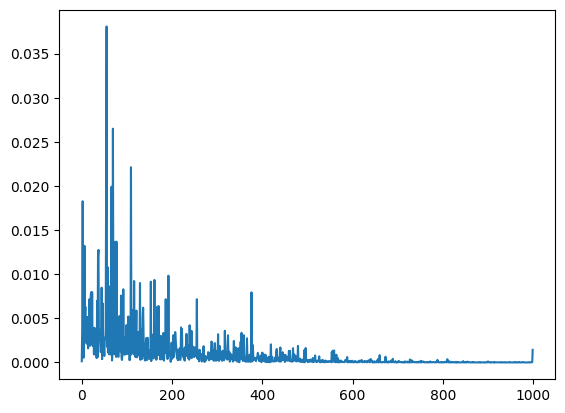

In [ ]:
plt.plot(P[0].detach().numpy())

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = LogisticRegression()

In [ ]:
reg.fit(X.cpu().numpy(), y.cpu().numpy())

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
normalized_mutual_info_score(y.cpu().numpy(), reg.predict(X.cpu().numpy()))

0.9999173347102615

In [ ]:
normalized_mutual_info_score(y_val, reg.predict(X_val))

0.9805959205564206

In [35]:
from sklearn.metrics import normalized_mutual_info_score

In [36]:
import numpy as np
import torch
from torch.autograd import Function
from typing import Tuple
from scipy.special import hyp2f1 as sp_hyp2f1  # SciPy exact/analytic continuation

# Small numerical guards
_EPS_Z = 1e-12     # keep z away from {0,1} if you know you stay in that domain
_DTYPE = torch.float32

def _to_numpy(x: torch.Tensor) -> np.ndarray:
    return x.detach().cpu().to(_DTYPE).numpy()

def _from_numpy(x: np.ndarray, device: torch.device) -> torch.Tensor:
    return torch.from_numpy(np.ascontiguousarray(x)).to(device=device, dtype=_DTYPE)

class Hyp2F1(Function):
    """
    Torch autograd wrapper for SciPy's 2F1(a,b;c;z).
    - Gradients are implemented w.r.t. z only:
        d/dz 2F1(a,b;c;z) = (a*b/c) * 2F1(a+1, b+1; c+1; z)
    - If any of a,b,c require grad, we raise (to avoid silent wrong grads).
    - Works with broadcasting across a,b,c,z.
    - Runs SciPy on CPU; safely moves tensors between devices.
    """
    @staticmethod
    def forward(ctx, a: torch.Tensor, b: torch.Tensor, c: torch.Tensor, z: torch.Tensor) -> torch.Tensor:
        # Guard: do not allow grads for a,b,c (unsupported)
        if a.requires_grad or b.requires_grad or c.requires_grad:
            raise RuntimeError("Hyp2F1 backward supports gradients w.r.t. z only (a,b,c must not require grad).")

        # Save for backward
        ctx.save_for_backward(a.detach(), b.detach(), c.detach(), z.detach())

        # Move to numpy CPU and broadcast
        a_np, b_np, c_np, z_np = map(_to_numpy, (a, b, c, z))
        a_np, b_np, c_np, z_np = np.broadcast_arrays(a_np, b_np, c_np, z_np)

        # Optional: clamp z away from known branch cut endpoints (helps in practice)
        z_np = np.clip(z_np, -1.0 + _EPS_Z, 1.0 - _EPS_Z)

        # Evaluate SciPy hypergeometric 2F1
        with np.errstate(over='raise', under='ignore', invalid='raise'):
            out_np = sp_hyp2f1(a_np, b_np, c_np, z_np)

        out = _from_numpy(out_np, z.device)
        return out

    @staticmethod
    def backward(ctx, grad_out: torch.Tensor) -> Tuple[torch.Tensor, ...]:
        (a, b, c, z) = ctx.saved_tensors
        device = z.device

        # Convert to numpy
        a_np, b_np, c_np, z_np = map(_to_numpy, (a, b, c, z))
        a1, b1, c1 = a_np + 1.0, b_np + 1.0, c_np + 1.0
        z_np = np.clip(z_np, -1.0 + _EPS_Z, 1.0 - _EPS_Z)

        # dF/dz = (a*b/c) * 2F1(a+1,b+1;c+1;z)
        with np.errstate(over='raise', under='ignore', invalid='raise'):
            Fp_np = sp_hyp2f1(a1, b1, c1, z_np)
        pref = (a_np * b_np) / c_np
        dF_dz_np = pref * Fp_np

        dF_dz = _from_numpy(dF_dz_np, device)
        grad_z = grad_out.to(_DTYPE) * dF_dz

        # No grads for a,b,c (return zeros). Must match number of inputs.
        grad_a = torch.zeros_like(a, dtype=_DTYPE)
        grad_b = torch.zeros_like(b, dtype=_DTYPE)
        grad_c = torch.zeros_like(c, dtype=_DTYPE)
        return grad_a, grad_b, grad_c, grad_z

def hyp2f1(a: torch.Tensor, b: torch.Tensor, c: torch.Tensor, z: torch.Tensor) -> torch.Tensor:
    """
    Public wrapper. Works with broadcasting. Only z may require grad.
    """
    return Hyp2F1.apply(a, b, c, z)

In [37]:
# primitives.py
import torch

def H_b(q: float, b: float, pbar: torch.Tensor, m: int) -> torch.Tensor:
    """
    H_b(q; p̄, m) = (1/q) * 2F1(-m, 1; q/b + 1; p̄)
    """
    device = pbar.device
    a = torch.as_tensor(float(-m),     device=device, dtype=_DTYPE)
    bb= torch.as_tensor(1.0,           device=device, dtype=_DTYPE)
    c = torch.as_tensor((q / b) + 1.0, device=device, dtype=_DTYPE)
    q_tensor = torch.as_tensor(q,      device=device, dtype=_DTYPE)
    return hyp2f1(a, bb, c, pbar.to(_DTYPE)) / q_tensor

def A_b(q: float, b: float, pbar: torch.Tensor, m: int) -> torch.Tensor:
    """
    A_b(q; p̄, m) = H_b(q) - 2 H_b(q+b) + H_b(q+2b)
    """
    Hb0 = H_b(q,         b, pbar, m)
    Hb1 = H_b(q + b,     b, pbar, m)
    Hb2 = H_b(q + 2 * b, b, pbar, m)
    return Hb0 - 2.0 * Hb1 + Hb2

In [38]:
import torch
from torch import Tensor


@torch.no_grad()
def _check_params(q: float, b: float):
    assert q > 0 and b > 0, "q>0 and b>0 required by the envelope"


def prob_cut_upper_and_gap(
    p: Tensor,p_left, p_right,w, q: float = 2.0, b: float = 1.0, zero_aware: bool = True
):
    """
    Given P (batch_size x K), return:
      sum_logU:  sum_ℓ log U_ℓ(P)  (single-bin specialization)
      Gamma:     sum_ℓ Γ_ℓ(P)      (binwise gap; single bin)
    Both in float64 for stability, grads propagate to p via autograd.
    """
    _check_params(q, b)
    p = p.to(torch.float64)
    B, K = p.shape
    # m = B  # single-bin specialization over the minibatch
    m = 1024

    # per-cluster mean p̄_ℓ
    pbar = p.mean(dim=0)  # [K]

    # log U_ℓ = -log q + log 2F1(-m,1; q/b+1; p̄_ℓ)
    c = (q / b) + 1.0
    twof1 = hyp2f1(
        torch.as_tensor(-float(m)).to(p),
        torch.as_tensor(1.0).to(p),
        torch.as_tensor(c, device=p.device),
        pbar,
    )
    # [K]
    # print(pbar, c, m)
    # print(twof1)

    # logU = -torch.log(
    #     torch.as_tensor(q, dtype=torch.float64, device=p.device)
    # ) + torch.log(twof1) + torch.log()
    U = (twof1 * (w.unsqueeze(-1)*p_left*(1-p_right)).mean(0)).sum()
    # sum_logU = logU.sum()  
    sum_logU = U.log()  -torch.log(
        torch.as_tensor(q, dtype=torch.float64, device=p.device))


    # Γ_ℓ = (m/2) * Var * A_b(q; p̄,m) ; with zero-aware variant if requested
    if zero_aware:
        # ω0(x)=x ;  Ω_ℓ = Σ_i p_{iℓ};  μ_ℓ = (Σ_i p_{iℓ}^2)/Ω_ℓ
        Omega = p.sum(dim=0).clamp_min(1e-12)  # [K]
        mu = p.pow(2).sum(dim=0) / Omega  # [K]
        # Var_ω0,ℓ = (1/Ω) Σ_i p_{iℓ}(p_{iℓ}-μ_ℓ)^2
        var = (p * (p - mu).pow(2)).sum(dim=0) / Omega  # [K]
    else:
        # plain within-bin variance over the minibatch
        var = p.var(dim=0, unbiased=False)  # [K]

    Ab = A_b(q, b, pbar, m)  # [K]
    Gamma = (0.5 * m) * (var * Ab).sum()

    return sum_logU, Gamma

In [39]:
rho = 1000.        # gap weight; tune 0.05–0.5
q   = 2.0        # envelope parameter (>0)
b   = 1.0        # exponent; b=1 corresponds to the Ratio-Cut specialization

for _ in range(1000):
    random_pairs_idx = np.random.choice(pairs.shape[0], batch_pair_size, replace=False)

    batch_pairs = pairs[random_pairs_idx]
    unique_idx, left_idx, right_idx = get_pairs_unique_map(batch_pairs)

    x_batch = X[unique_idx].contiguous()
    y_batch = y[unique_idx]  # labels only used for monitoring in your printout

    # y_for_z, y_for_bias = network(x_batch)                 # we only need the stick-breaking head
    y_for_z = network(x_batch)                 # we only need the stick-breaking head
    # y_for_bias = y_for_z
    # p_for_bias = stick_breaking_logits_to_probs_log(y_for_bias).exp()
    # logp = stick_breaking_logits_to_probs_log(y_for_z)
    logp = F.log_softmax(y_for_z,dim=-1)
    p    = logp.exp()                             # [B,K], row-stochastic
    w = (y_batch[left_idx] == y_batch[right_idx]).float().to(x_batch)

    # === Paper-justified objective: J_rho = U + rho * Gamma ===
    sum_logU, Gamma = prob_cut_upper_and_gap(p,p[left_idx], p[right_idx],w, q=q, b=b, zero_aware=True)

    # balance = (p_for_bias.mean(0) - 1 / K).square().sum()
    #  + ( p.mean(0) - 1 / K).square().sum()
    # balance = ( p.mean(0) - 1 / K).square().sum()
    # balance=0.
    loss = sum_logU + rho * Gamma 
    # + balance

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        # Z,_ = network(X)
        Z = network(X)
        Z = stick_breaking_logits_to_probs_log(Z)
        pred = Z.argmax(dim=-1)
        score = normalized_mutual_info_score(y.cpu(), pred.cpu().numpy())
        print(
            f"logU={sum_logU.item():.4g} | Gamma={Gamma.item():.4g} | "
            f"J_rho={loss.item():.4g} | NMI={score:.4f}"
            , balance.item()
        )

logU=-2.507 | Gamma=4.462e-05 | J_rho=-2.462 | NMI=0.0000 nan
logU=-2.513 | Gamma=2.371e-05 | J_rho=-2.489 | NMI=0.0000 nan
logU=-2.513 | Gamma=1.028e-05 | J_rho=-2.503 | NMI=0.0000 nan
logU=-2.515 | Gamma=6.042e-06 | J_rho=-2.509 | NMI=0.0000 nan
logU=-2.511 | Gamma=3.901e-06 | J_rho=-2.507 | NMI=0.0000 nan
logU=-2.512 | Gamma=2.703e-06 | J_rho=-2.509 | NMI=0.0000 nan


KeyboardInterrupt: 